## Background

The tourism company "Visit with us" seeks to establish a viable business model to grow its business.
One viable model for expansion is the introduction of new package offerings. There are currently 5 existing packages being offered - Basic, Standard, Deluxe, Super Deluxe, and King. 18% of customers purchased at least one package last year.
Customers in the last campaign were contacted at random however, with this new product launch, the company seeks to use data to optimize their expenditure.

### The New Package

The package is a Wellness Tourism Package. 
Wellness Tourism is travel that allows the traveler to kick-start, continue to maintain, or enhance their current healthy lifestyle, with the ultimate goal of improving their overall well-being. We thus need to analyze the customer data to provide recommendations and develop a model to predict potential customers for the new travel package.

#### Objective - Predict which customers are more likely to purchase our new package.

## Data Dictionary
### Customer details:

* **CustomerID:** Unique customer ID
* **ProdTaken:** Whether the customer purchased a package or not (0: No, 1: Yes)
* **Age:** Customers Age
* **TypeofContact:** How the customer was contacted (Company Invited or Self Inquiry)
* **CityTier:** City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* **Occupation:** Customers Occupation
* **Gender:** Customers Gender 
* **NumberOfPersonVisiting:** Total number of people on the trip with the customer
* **PreferredPropertyStar:** Preferred hotel property rating by the customer
* **MaritalStatus:** Customers Marital Status
* **NumberOfTrips:** Average number of trips per year taken by customer
* **Passport:** Does the customer have a passport or not (0: No, 1: Yes)
* **OwnCar:** Does the customer own a car or not (0: No, 1: Yes)
* **NumberOfChildrenVisiting:** Total number of children aged less than 5 planning to take the trip with the customer
* **Designation:** Customers Designation in their current organization
* **MonthlyIncome:** Customers Gross monthly income

### Customer interaction data: 

* **PitchSatisfactionScore:** Sales pitch satisfaction score given by the customer 
* **ProductPitched:** The product pitched by the company salesperson
* **NumberOfFollowups:** The total number of follow-ups completed by the salesperson after the sales pitch
* **DurationOfPitch:** The duration of the pitch given by the salesperson to the customer

In [669]:
#!pip install xgboost

In [825]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [671]:
data = pd.read_excel('C:/Users/ffpch/Desktop/PGP-DSBA/Travel PKG/Tourism.xlsx', sheet_name = 'Tourism')
#C:\Users\ffpch\Desktop\PGP-DSBA\Travel PKG

## Data Overview

Let's vew the shape of our data

In [672]:
data.shape

(4888, 20)

We have 4888 Rows and 20 Columns

#### View Data Sample

In [673]:
np.random.seed(1)
data.sample(8)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0


#### Let's view our data types

In [674]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There are mostly numeric data types, and a few object types
* We notice a lot of null values so we will explore
* Columns like OwnCar, ProdTaken, Passport that are currently numerical, and all the object types can be converted to categories

#### Fix Data Types to categories and view counts

In [675]:
catcols = ['ProdTaken','TypeofContact','CityTier','Occupation','Gender','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','Designation','NumberOfPersonVisiting','NumberOfChildrenVisiting']

for cols in catcols:
    data[cols] = data[cols].astype('category')
    
newcats = catcols # our categorical columns
for col in newcats:
    """Print the column name,
    print the value counts,
    then print dividers"""
    print(f'\033[1m'+ '\033[36m' + '\033[4m' + col + '\033[0m')
    print(data[col].value_counts())
    print('-'*40)
    print(' ')

ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64
----------------------------------------
 
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
----------------------------------------
 
CityTier
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
----------------------------------------
 
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
----------------------------------------
 
Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
----------------------------------------
 
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
----------------------------------------
 
PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
----------------------------------------
 
Mari

#### Observations

Counts look good but we notice that there is something odd with the Gender column. We'll fix that later on.
* There are only 2 freelancers in our dataset

Let's revsit and resolve missing values

In [676]:
pd.DataFrame(data={"% of Missing Values": round(data.isna().sum() / data.isna().count() * 100, 2)}
            ).sort_values(by = "% of Missing Values", ascending = False)

,% of Missing Values
DurationOfPitch,5.14
MonthlyIncome,4.77
Age,4.62
NumberOfTrips,2.86
NumberOfChildrenVisiting,1.35
NumberOfFollowups,0.92
PreferredPropertyStar,0.53
TypeofContact,0.51
Designation,0.00
OwnCar,0.00


* DurationofPitch, Age, MonthlyIncome all have a relatively higher number of missing values. 
* NumberOfTrips, NumberOfChildrenVisiting, TypeofContact, NumberOfFollowups, and PreferredPropertyStar also have quite a few missing values that require treatment.

Let's drop our CustomerID column, as it has no value to us. We'll then fix missng values

In [677]:
data.drop('CustomerID', axis = 1, inplace = True)
data.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1939,1,32.0,Company Invited,3,NaN,Salaried,Male,2,1.0,Deluxe,3.0,Married,1.0,0,3,1,0.0,Manager,19707.0
4291,0,37.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,3.0,Married,6.0,0,5,1,1.0,Executive,21221.0
685,0,26.0,Company Invited,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,2.0,0,3,1,1.0,Manager,NaN
2740,1,19.0,Self Enquiry,1,10.0,Salaried,Male,3,4.0,Basic,3.0,Single,3.0,0,4,0,1.0,Executive,20098.0
3595,0,29.0,Self Enquiry,1,34.0,Small Business,Female,3,6.0,Deluxe,5.0,Married,2.0,0,4,1,1.0,Manager,23886.0


Let's start to treat missing values

For the numeric columns, we'll replace missing values with the mean of the respective columns 

We'll fix numeric coluns first then address the categorical

In [678]:
# Collect numerical columns with missing values  
numnacols = ['DurationOfPitch', 'Age', 'MonthlyIncome', 'NumberOfTrips', 'NumberOfFollowups']

# Collect categorical column with missing values 
catnacols = ['PreferredPropertyStar', 'NumberOfChildrenVisiting','TypeofContact']

In [679]:
# View summary of Numeric columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [680]:
# For each column with missing values, replace with the mean

for col in numnacols:
    data[col] = data[col].replace(np.nan,data[col].mean())

In [681]:
# Let's check the missing columns again

data.isna().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    66
Designation                  0
MonthlyIncome                0
dtype: int64

Now we have only the categorical columns left so Let's replace them using the respective mode of each column 

In [682]:
data['TypeofContact'] = data['TypeofContact'].fillna(data['TypeofContact'].mode()[0])

In [683]:
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0])

In [684]:
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0])

Now let's review missing values

In [685]:
# Let's check the missing columns again

data.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

There are no more missing values

#### Let's review data once more

In [686]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

View Data Summary

In [687]:
data.describe(include = 'all').fillna("--").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,2.0,0.0,3968.0,--,--,--,--,--,--,--
Age,4888.0,--,--,--,37.622265,9.098418,18.0,31.0,37.0,43.0,61.0
TypeofContact,4888,2,Self Enquiry,3469,--,--,--,--,--,--,--
CityTier,4888.0,3.0,1.0,3190.0,--,--,--,--,--,--,--
DurationOfPitch,4888.0,--,--,--,15.490835,8.297971,5.0,9.0,14.0,19.0,127.0
Occupation,4888,4,Salaried,2368,--,--,--,--,--,--,--
Gender,4888,3,Male,2916,--,--,--,--,--,--,--
NumberOfPersonVisiting,4888.0,5.0,3.0,2402.0,--,--,--,--,--,--,--
NumberOfFollowups,4888.0,--,--,--,3.708445,0.997882,1.0,3.0,4.0,4.0,6.0
ProductPitched,4888,5,Basic,1842,--,--,--,--,--,--,--


## Exploratory Data Analysis

### Univariate

In [688]:
# we're creating a function to plot a histogram and boxplot of our features
# we can pass any of our numeric columns as input


def histbox(col,bins = None):
    # create the plot
    fig,(axb,axh) = plt.subplots(gridspec_kw = {"height_ratios" : (0.25,0.75)}, nrows = 2, sharex = True, figsize = (10,7))
    # define properties for the point used to mark the mean position on the box plot
    meanpointprops = dict( marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
    
    # create the boxplot
    sns.boxplot(x = col, ax=axb, width = 0.5, linewidth = 1.2, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) 
    # show vertical mean line
    axb.axvline(col.mean(), color = '#d2624f', linestyle = 'solid', linewidth = 1, label = 'Mean')  
    # show vertical median line
    axb.axvline(col.median(), color = 'black', linestyle = 'dashed', linewidth = 1, label = 'Median')  
    
    # create the histogram
    sns.distplot(col, ax=axh, kde=False, color = '#8DB7E5', bins = bins) 
    # show the average line 
    axh.axvline(col.mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean') 
    # show the median line 
    axh.axvline(col.median(), color='black', linestyle='dashed', linewidth = 1, label = 'Median')    
    sns.set(font_scale = 1.1, font = 'Montserrat', style = 'darkgrid')   
    plt.legend(loc = 'upper left')

    # print measures of central tendency for specified column
    print('\033[1m'+ '\033[36m' + str(col.name)+ '\033[0m') 
    print('-'* 15)
    print('Mean: ',round(col.mean(),2))
    print('Median: ',round(col.median(),2))
    
    plt.show()    

### Customer Age

Age
---------------
Mean:  37.62
Median:  37.0


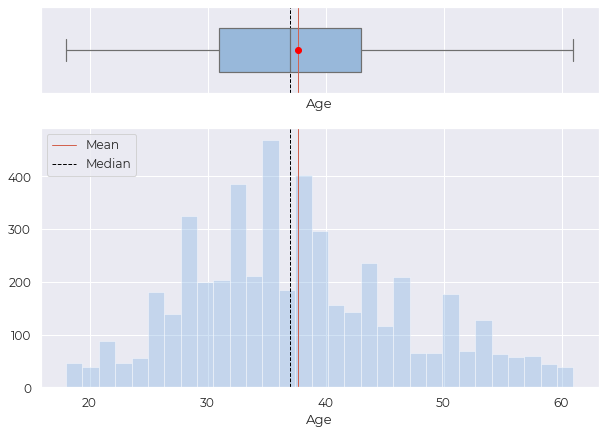

In [689]:
histbox(data['Age'])

**Observations** - There's an extremely slight right skewness in the age of customers. Median age is 37

### Duration of Pitch

DurationOfPitch
---------------
Mean:  15.49
Median:  14.0


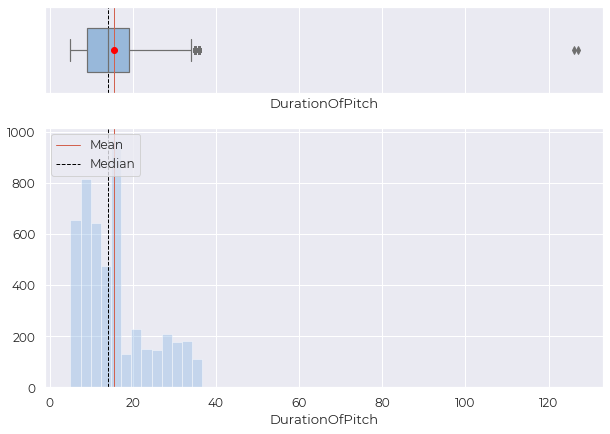

In [690]:
histbox(data['DurationOfPitch'])

**Observations** - The Duration of Pitches is skeweded right towards longer pitches

### Number of Follow Ups

NumberOfFollowups
---------------
Mean:  3.71
Median:  4.0


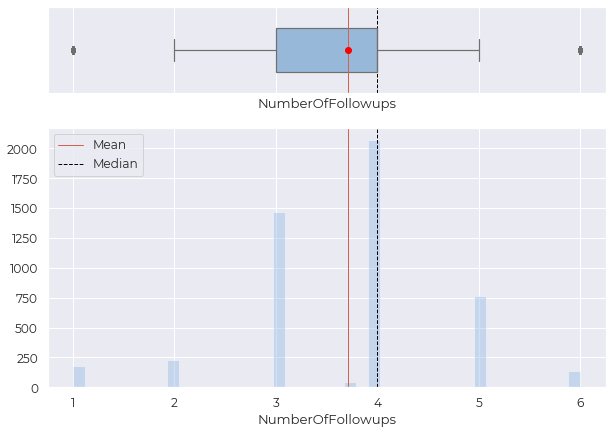

In [691]:
histbox(data['NumberOfFollowups'])

The Number of follow ups is left skewed towards a smaller number of follow ups.

### Number of Trips

NumberOfTrips
---------------
Mean:  3.24
Median:  3.0


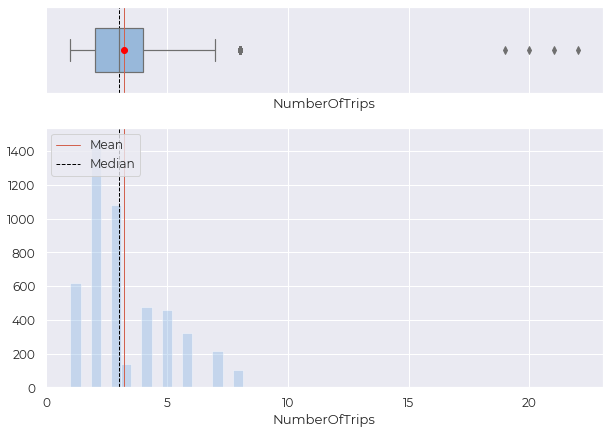

In [692]:
histbox(data['NumberOfTrips'])

Most customers tend to take 3 or less trips but the data is skewed by some who take relatively more trips. 

MonthlyIncome
---------------
Mean:  23619.85
Median:  22655.0


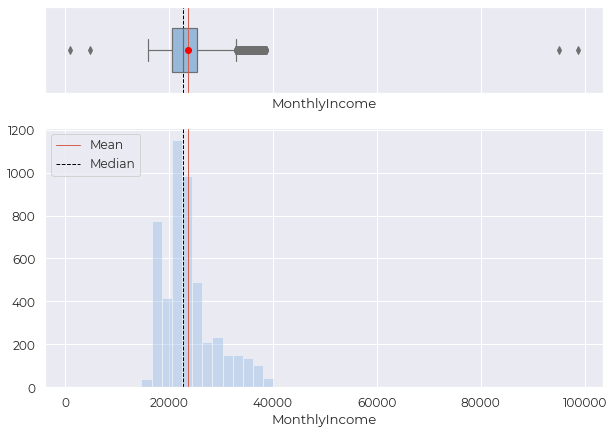

In [693]:
histbox(data['MonthlyIncome'])

Monthly income is slightly rightskewed. The median income is 22,655

### Categorical Variables 

Due to the number of categorical variables, we will use a function to plot count plots for them at once then lay out observatons at the end

#### Create a function to label our countplots

In [694]:
# function to label our plots

def plotcat (plot, col):
    
    for p in g.patches:
        
        tot = len(col)
        perc = "{:.0f}%".format((p.get_width()/tot) * 100) # calulate percentage 
        
        x = 50 # set x positon  
        y = p.get_height()/2 + 0.08 + p.get_y() # set y positon  
        
        g.annotate(perc,(x,y),fontsize = 17, color ='black') # annotate the percentage on bars      

#### Create another function to plot a grid of all our categorical variables 

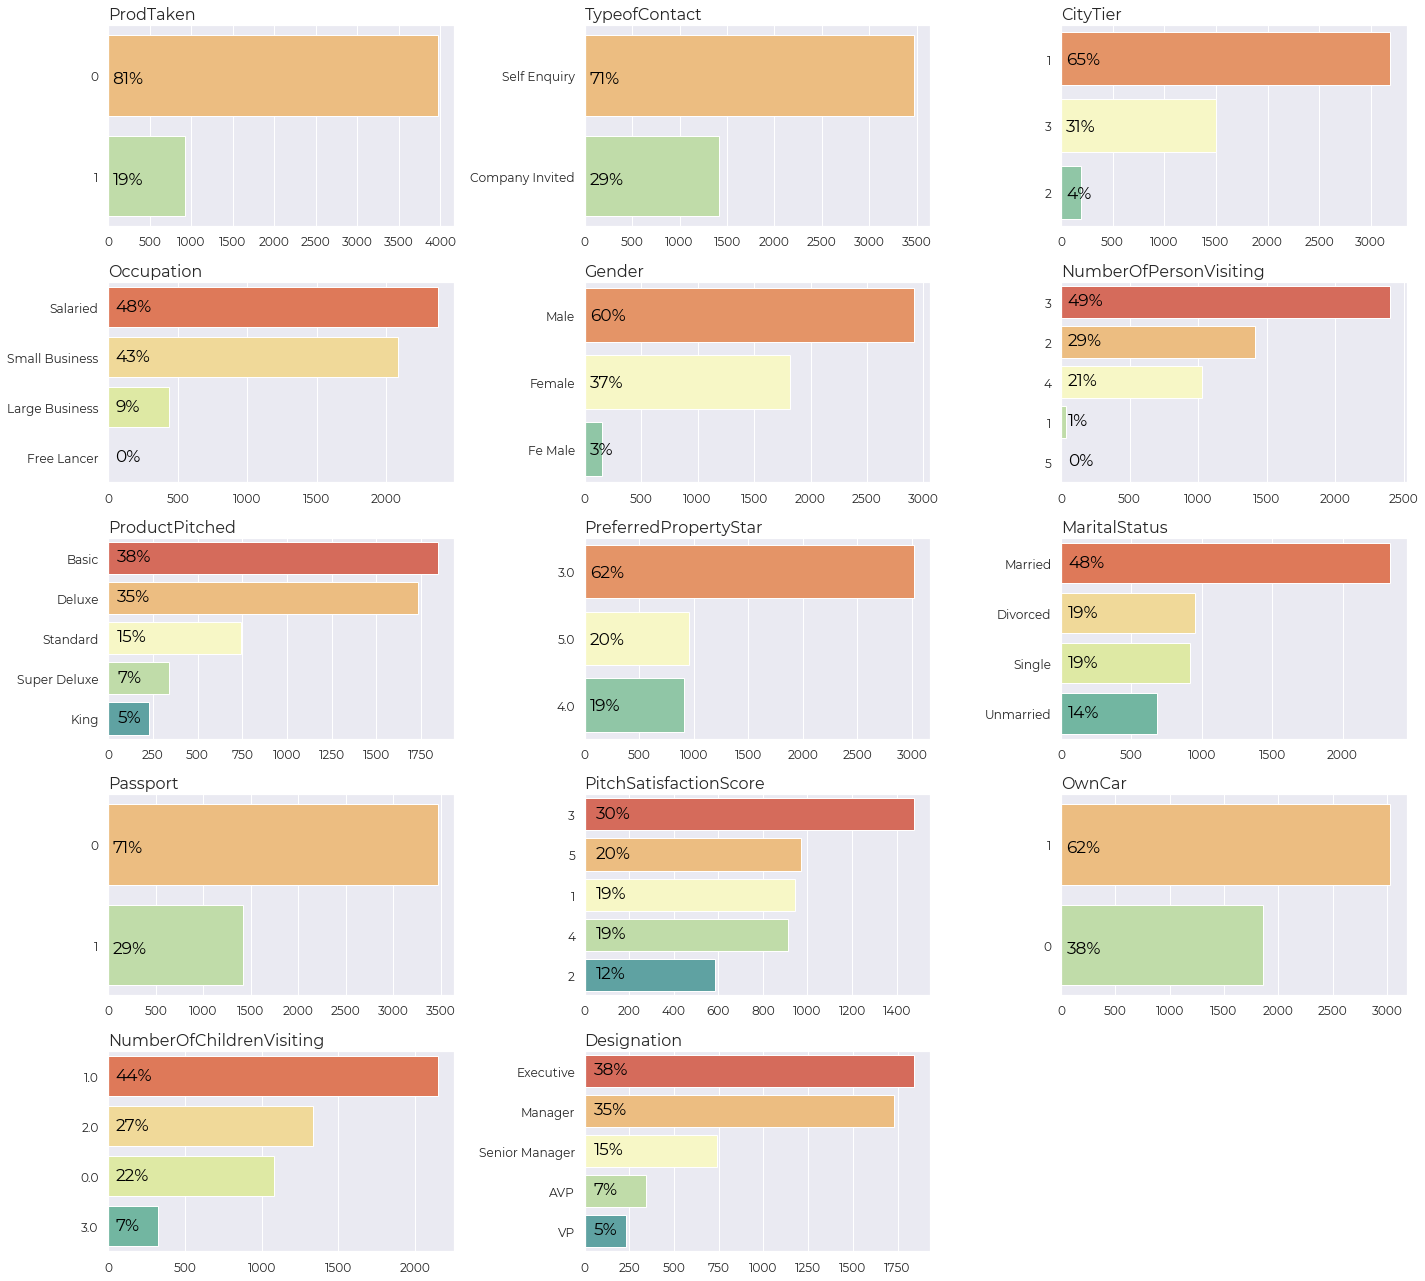

In [695]:
# get our categorical columns into a list so we can run a loop
catcols = data.select_dtypes(include = "category").columns.to_list()

plt.figure(figsize = (20,18))

# we're using a "for" loop to apply our defined function ot the columns
for i, catcol in enumerate(catcols):
    plt.subplot(5, 3, i + 1) # create the sub plots for each column : 2 rows, 4 cols
    order = data[catcol].value_counts().sort_values(ascending = False).index.values # to sort the bars
    
    g = sns.countplot(y = data[catcol], order = order, palette = 'Spectral')
    
    
    plt.title(catcol, fontsize = 16, loc ='left', fontweight ="medium")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plotcat(g, data[catcol])

**Observations on Categorical Variables**

* 81% of customers did not purchase a package in the previous campaign, and 19% did
* 71% of customers were self inquires and 29% were company invited
* Most customers live in City Tier 1 (65%), followed by Tier 3 (31%) , then 2 (4%)
* 48% of customers are salaried, and 43% have small businesses. 9% have large businesses and there are barely any freelancers (close to 0%)
* 60% of customers in the sample are Male and 40% are Female (The Female category break-out will be fixed later)
* Most customers have 3 people going on the trip with them (49%). 29% have 2 people going on the trip with them. Almost no customers have 5 people going on the trip with them
* Majority of customers were pitched the Basic and Deluxe Package (38% and 35%) respectively
* The most prevalent Property Star rating was 3 stars (62%). 5 and 4 star ratings were given by similar number of customers (20% and 19% respectively)
* 48% of customers are married, Single and Divorced customers each make up 19% and the remaining 14% are unmarried 
* 71% of customers have a passport
* Most customers gave a pitch satisfaction score of 3 (30%) and the next most common was 5 (20%)
* 62% of customers own a car
* Majority of customers had 1 child less than 5 taking the trip with them. 27% had 2, 22% had none, and 7% had 3 kids under 5 travelng with them
* Majority of customers are Executives (38%) and 35% are managers

### Bivariate Analysis & Multivariate

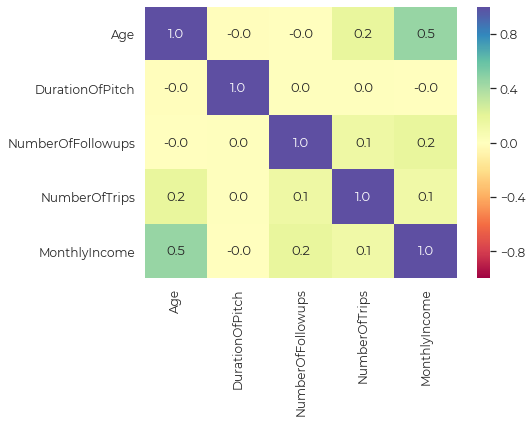

In [696]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1f',cmap="Spectral")
plt.show()

**Observations**
* There are no highly correlated columns, and we see some correlation between the Age and Income of customers

#### Let's view trends on who did and didn't make a purchase across each package offered

### Customer Monthly Income & Designation Across City Tiers 
Customers who did and didn't buy the package, are shown across each package

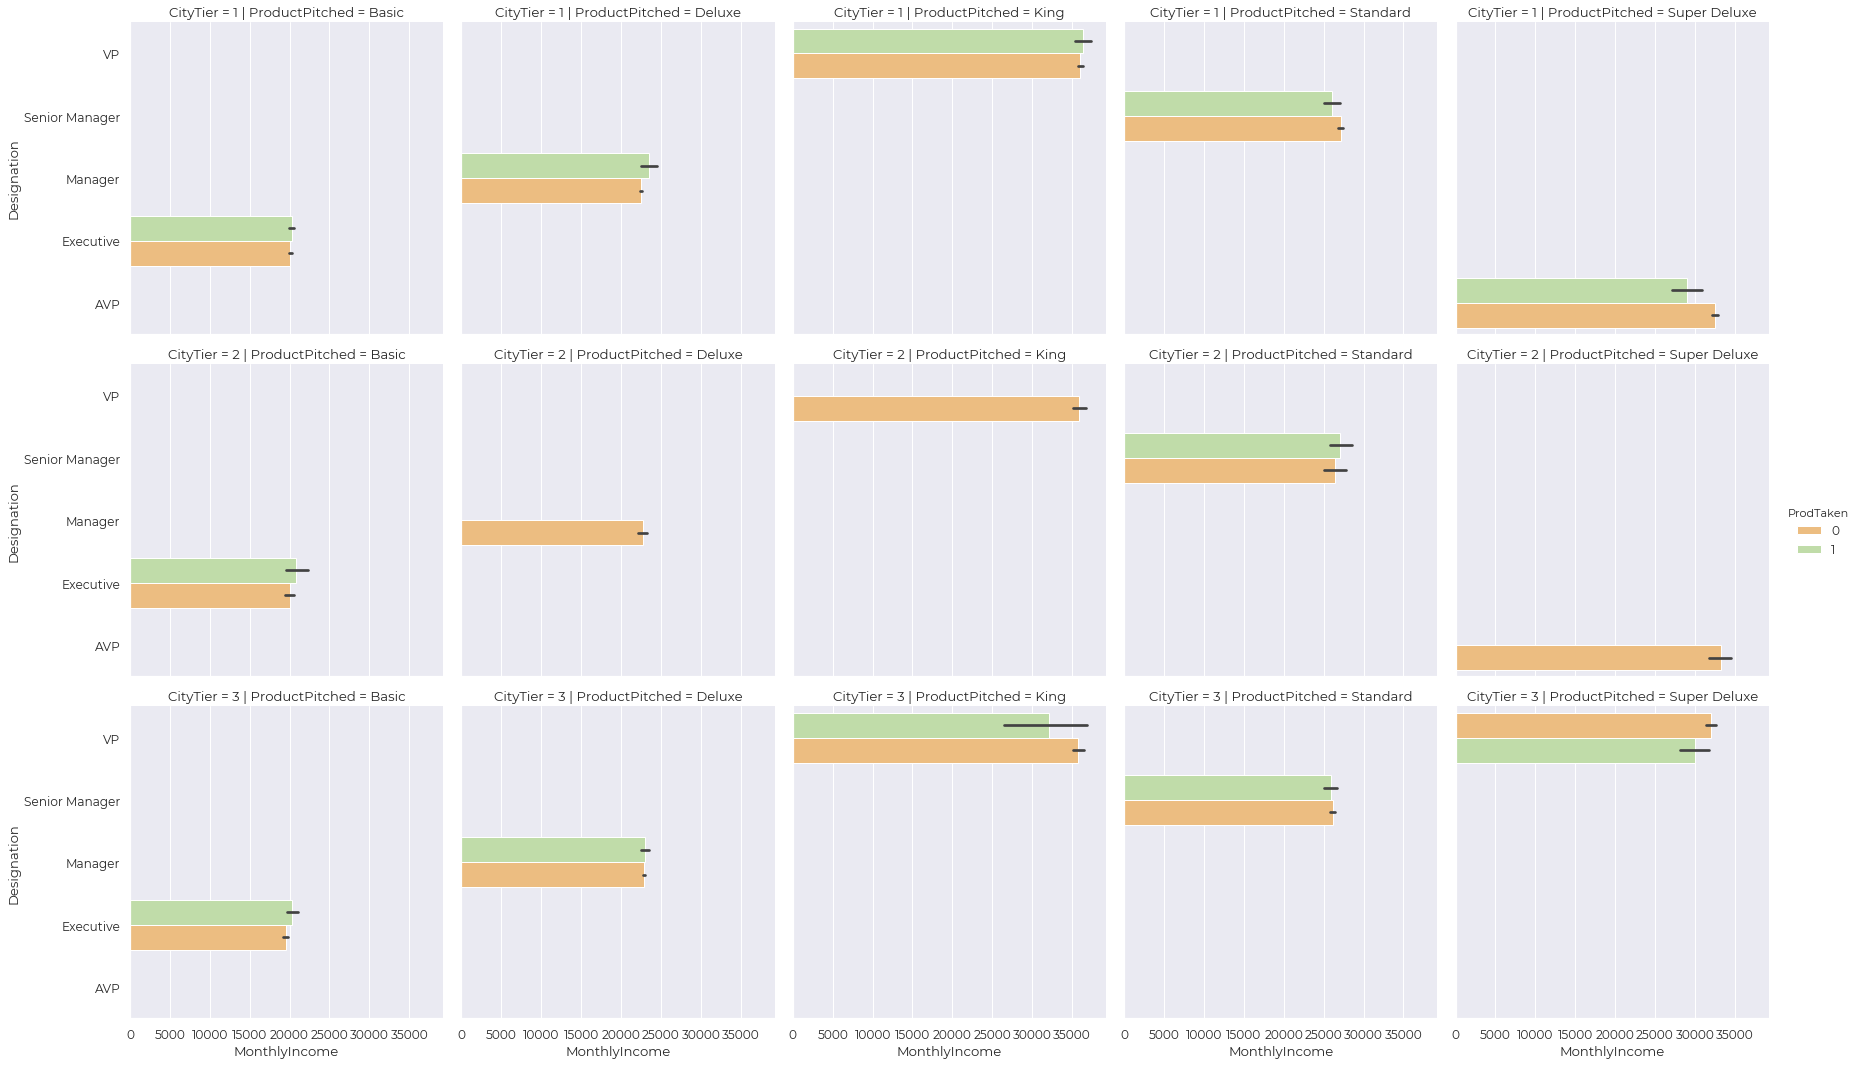

In [697]:
sns.catplot( y = 'Designation', x = 'MonthlyIncome', kind = 'bar' , hue = 'ProdTaken' ,row = 'CityTier', col = 'ProductPitched', data = data, palette = "Spectral")
plt.show()

We notice some interesting patterns across the Designations of customers :
    
* All customers that were pitched the Basic Package are ExecutIves and they earn the lowest monthly income overall.
* There isn't any noticeable difference in the income of those who purchased and those that didn't
* CIty Tier 2 had the least number of customers who purchased packages 
* Customers with the highest income ( > 30000 monthly income ) were pitched the Super Deluxe and King Package
* All clients that were pitched the King package are VP's
* All Clients that were pitched the Standard Package are Senior Managers

Let's used stacked bars to explore the target variable with other variables

In [698]:
def stackedbar(data, col):
    """
    Print the category counts,
    plot a stacked bar chart

    data: dataframe
    col: any of our independent variable columns 
    """
    sns.set(palette ="Spectral_r")
    count = data[col].nunique()
    
    sort = data["ProdTaken"].value_counts().index[-1]
    tabs = pd.crosstab(data[col], data["ProdTaken"], margins=True).sort_values(by=sort, ascending=False) # crosstab of input col and target var.
    
    print(tabs)
    print("-" * 80)
    
    # plot crosstab
    tab = pd.crosstab(data[col], data["ProdTaken"], normalize="index").sort_values(by=sort, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    
    plt.legend(loc="best",frameon=False,)
    plt.legend(loc="best", bbox_to_anchor=(1, 1))
    plt.show()

### Purchasing Trend Across Packages

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
--------------------------------------------------------------------------------


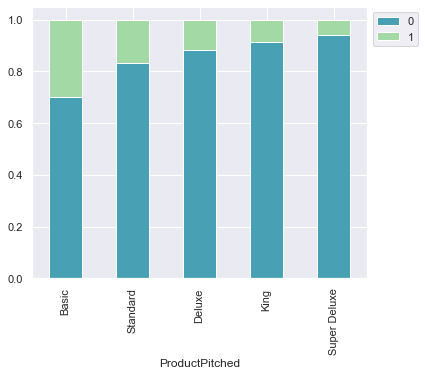

In [699]:
stackedbar(data, "ProductPitched")

**Observations** 

The Basic package was the most purchased package, and had the highest proportion of customers who purchased the package they were pitched. King and Super Deluxe were the least purchased and Super Deluxe had the smallest proportion of buyers out of those that the Company showed it to

### Marital Status of Customers 

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
--------------------------------------------------------------------------------


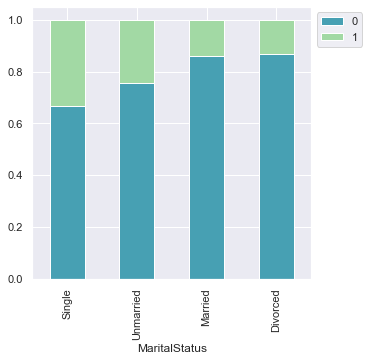

In [700]:
stackedbar(data, "MaritalStatus")

**Observations** - Single customers has the most proportion of customers who purchased but Married customers had the highest number of purchases

### Occupation of Customers 

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
--------------------------------------------------------------------------------


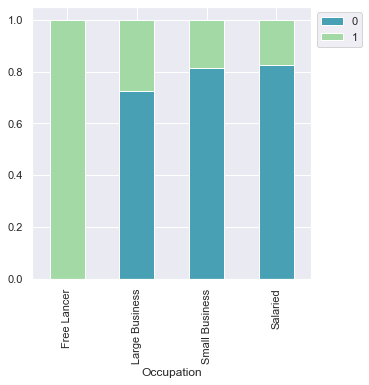

In [701]:
stackedbar(data, "Occupation")

**Observations** - There were barely any freelancers but they all purchased. Large business customers had the highest relevant  proportion of customers that purchased, SmalL business and Standard had an equal proproton 

### Type of Contact

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
--------------------------------------------------------------------------------


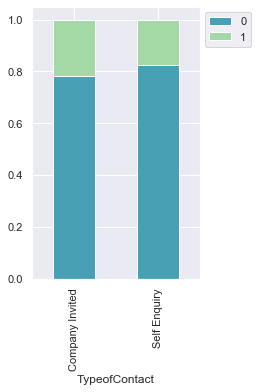

In [702]:
stackedbar(data, "TypeofContact")

**Observations** - A lot more customers contacted the company on their own, however the ratio of those that purchased was fairly close across both types of contact

### Number of People Visiting  with Customers

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
--------------------------------------------------------------------------------


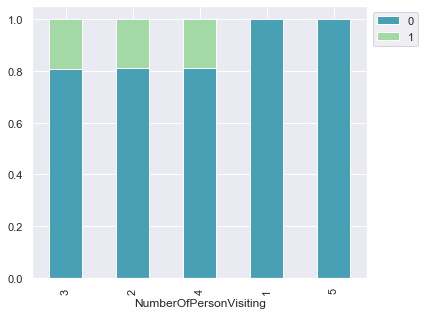

In [703]:
stackedbar(data, "NumberOfPersonVisiting")

**Observations** - The proportion of people with 2,3, and 4 people visiting is the same  ( ~ 20%)

### City Tier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
--------------------------------------------------------------------------------


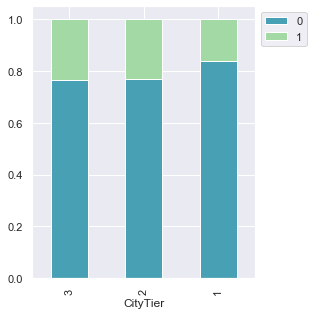

In [708]:
stackedbar(data, "CityTier")

City tier 2 and 3 had an equal ration of customer the purchased

### Number of Children Visiting

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
--------------------------------------------------------------------------------


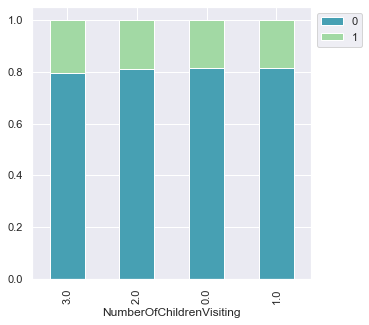

In [709]:
stackedbar(data, "NumberOfChildrenVisiting")

The proportion of customers who purchased is relatively the same across all categories of kids under 5 years old. This isnt a factor.

### ProdTaken  vs Passport Status and Type of Contact

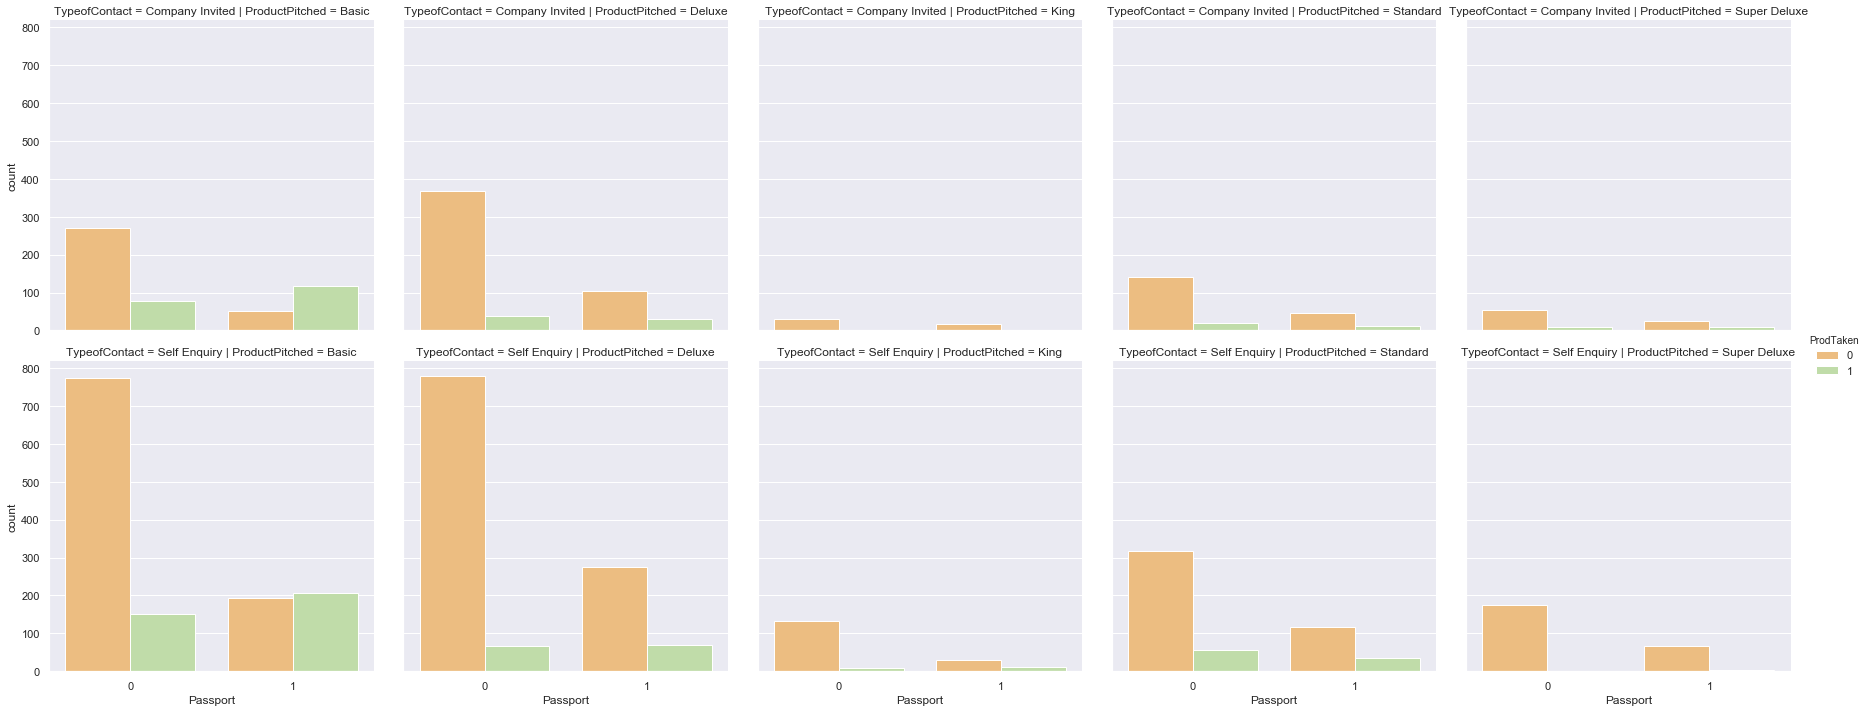

In [850]:
sns.catplot( x = 'Passport', kind = 'count' , hue = 'ProdTaken' ,row = 'TypeofContact', col = 'ProductPitched', data = data, palette = "Spectral")
plt.show()

**Observation** 

* The largest group of purchasers a packages were passport holders that contacted the company on their own accord. They also purchased the Basic package 
* Most customers that didn't purchase the package pitched don't have a passport

### Number of People Visiting and Car Ownership Status by Package

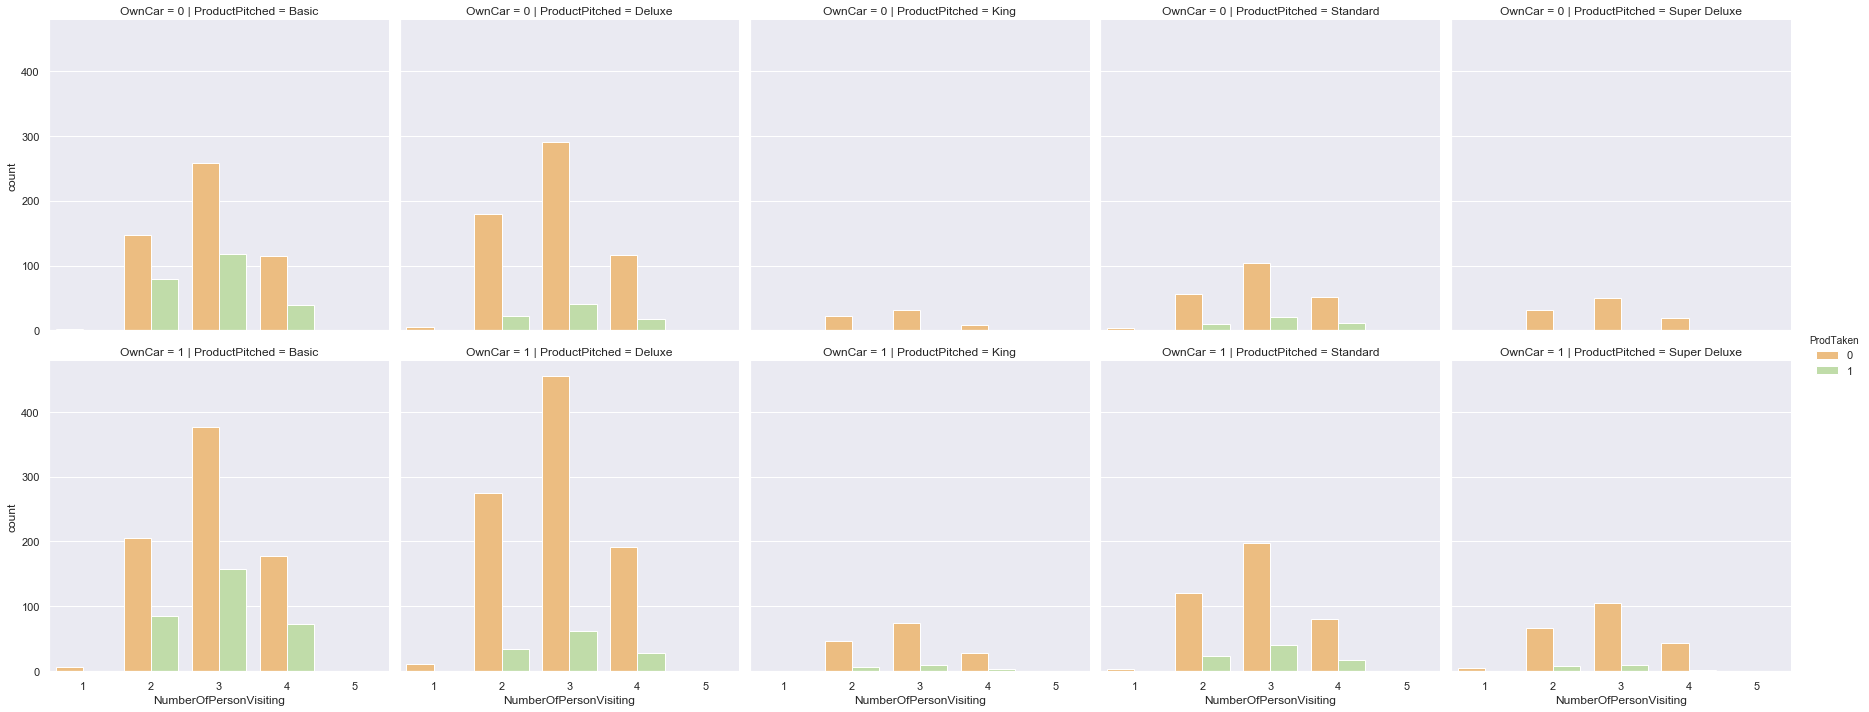

In [851]:
sns.catplot( x = 'NumberOfPersonVisiting', kind = 'count' , hue = 'ProdTaken' ,row = 'OwnCar', col = 'ProductPitched', data = data, palette = "Spectral")
plt.show()

**Observations** - Car ownership does not seem to matter, however, this output indicates we'd ideally focus on customers that aim to travel with 2, 3 or 4 people traveling with them. Customers with 3 people purcahsed the highest number of packages

### Marital Status and Occupation by Package 

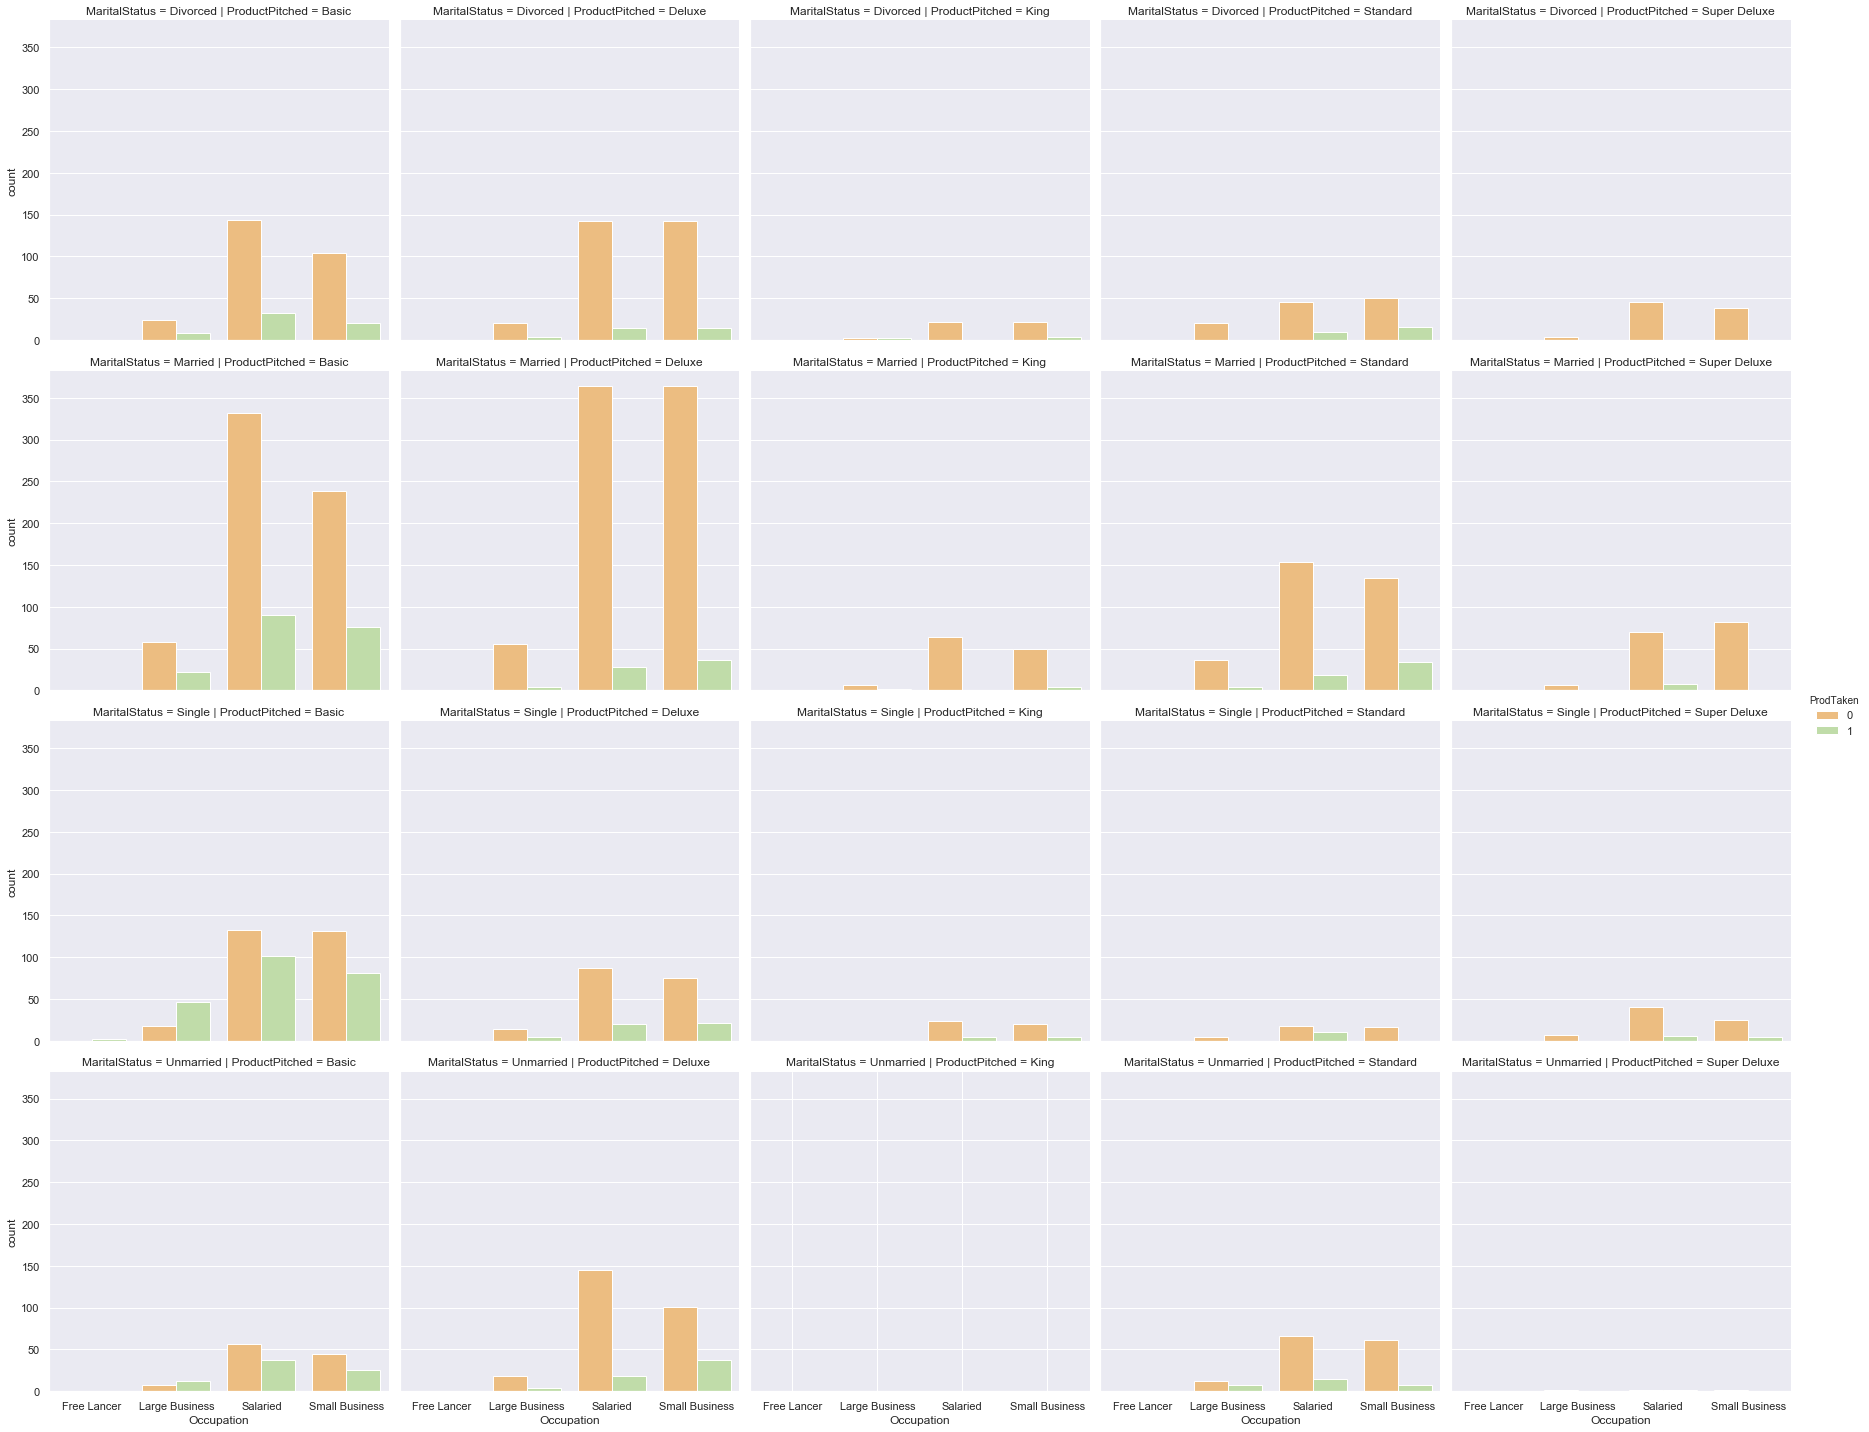

In [852]:
sns.catplot( x = 'Occupation', kind = 'count' , hue = 'ProdTaken' ,row = 'MaritalStatus', col = 'ProductPitched', data = data, palette = "Spectral")
plt.show()

There is a noticeable difference in the ratio of married customers that did not purchase the Deluxe package when pitched it. There was a relatively similar amount of married and single customers that bought the Basic package which is the most popular 

## Data Pre-Processing

####  Let's further clean our data

Let's fix the Gender column

In [710]:
data['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [711]:
# let's merge "Female" and "Fe Male"

data['Gender'].replace("Fe Male","Female" , inplace = True)

#### Let's recheck

In [712]:
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Our Gender coulmn is fixed

In [713]:
data.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [714]:
data.describe(include="all").fillna("--").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,2.0,0.0,3968.0,--,--,--,--,--,--,--
Age,4888.0,--,--,--,37.622265,9.098418,18.0,31.0,37.0,43.0,61.0
TypeofContact,4888,2,Self Enquiry,3469,--,--,--,--,--,--,--
CityTier,4888.0,3.0,1.0,3190.0,--,--,--,--,--,--,--
DurationOfPitch,4888.0,--,--,--,15.490835,8.297971,5.0,9.0,14.0,19.0,127.0
Occupation,4888,4,Salaried,2368,--,--,--,--,--,--,--
Gender,4888,2,Male,2916,--,--,--,--,--,--,--
NumberOfPersonVisiting,4888.0,5.0,3.0,2402.0,--,--,--,--,--,--,--
NumberOfFollowups,4888.0,--,--,--,3.708445,0.997882,1.0,3.0,4.0,4.0,6.0
ProductPitched,4888,5,Basic,1842,--,--,--,--,--,--,--


#### Let's check and treat outliers
* Our experiments were previously run without treating outliers, and the output with treated outliers was used instead

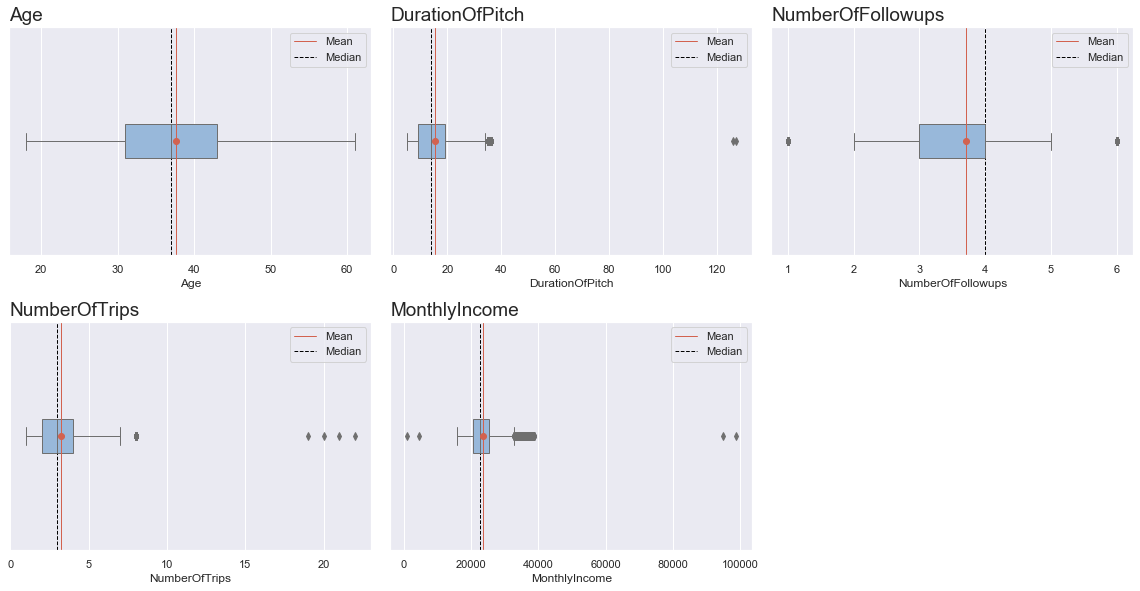

In [715]:
# let's plot boxplots of all columns to check for outliers
plt.figure(figsize = (16,12)) # set size
cols2check = data.select_dtypes(include = np.number).columns.tolist() # get numerical columns

for i, check_col in enumerate(cols2check): 
    meanpointprops = dict(marker='o', markeredgecolor='#d2624f',markerfacecolor='#d2624f') #formatting for mean point
    plt.subplot(3, 3, i + 1) # grid
    sns.boxplot(x = data[check_col], width = 0.15, linewidth = 1, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) # boxplot
    plt.axvline(data[check_col].mean(),color = '#d2624f', linestyle = 'solid',linewidth = 1, label = 'Mean') # mean line
    plt.axvline(data[check_col].median(),color = 'black', linestyle = 'dashed',linewidth = 1, label = 'Median')# median
    plt.legend(loc = 'upper right') # legend

    plt.tight_layout()
    plt.title(check_col, size = 19, loc = 'left')

plt.show()

We'll treat outliers becasue even though they could potentially occur in real life, in this scenario, they likely won't have high represntation in our customer base. We'll treat them to avoid any potential issues in modeling

In [755]:
# Trim outliers by removing the points outside the upper and lower whiskers
def trim_outliers(df, col):
    
    Q1 = df[col].quantile(0.25) # Q1 = 25th percentile
    Q3 = df[col].quantile(0.75) # Q3 = 75th precentile
    IQR = Q3 - Q1 # definition of inter-quartile range
    Lower = Q1 - 1.5 * IQR
    Upper = Q3 + 1.5 * IQR
    
    # All values outside the upper and lower whisker will be 
    # assigned the values of the upper and lower whisker respectively 
    df[col] = np.clip(df[col], Lower, Upper)
    return df

# Treat columns by applying the function above

def treat_columns(df, columns): # takes a dataframe and a list of columns
    
    for c in columns: # for each column in the list of columns...
        df = trim_outliers(df, c) # treat outliers in the column
    return df # return the dataframe 

In [767]:
# Treat outliers
cols2treat = ['DurationOfPitch', 'NumberOfTrips', 'NumberOfFollowups', 'MonthlyIncome']
data2 = treat_columns(data, cols2treat)

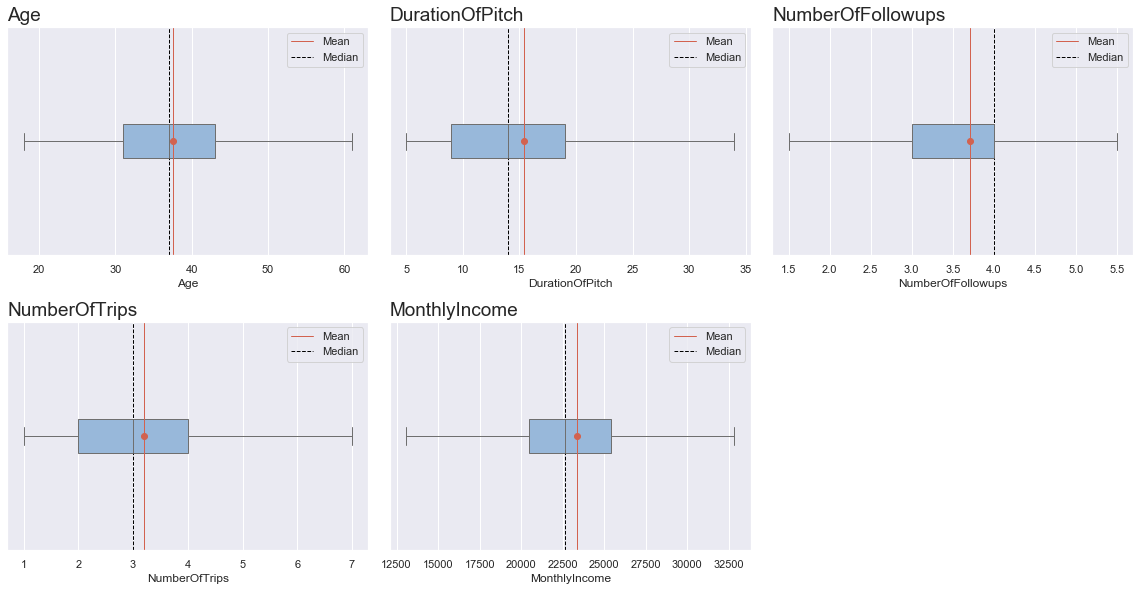

In [768]:
# let's plot boxplots of all columns to check for outliers
plt.figure(figsize = (16,12)) # set size
cols2check = data2.select_dtypes(include = np.number).columns.tolist() # get numerical columns

for i, check_col in enumerate(cols2check): 
    meanpointprops = dict(marker='o', markeredgecolor='#d2624f',markerfacecolor='#d2624f') #formatting for mean point
    plt.subplot(3, 3, i + 1) # grid
    sns.boxplot(x = data2[check_col], width = 0.15, linewidth = 1, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) # boxplot
    plt.axvline(data2[check_col].mean(),color = '#d2624f', linestyle = 'solid',linewidth = 1, label = 'Mean') # mean line
    plt.axvline(data2[check_col].median(),color = 'black', linestyle = 'dashed',linewidth = 1, label = 'Median')# median
    plt.legend(loc = 'upper right') # legend

    plt.tight_layout()
    plt.title(check_col, size = 19, loc = 'left')

plt.show()

Our treated columns are better now.

## Model Building

1. Data prep
2. Split the data into training and testing sets
3. Build models in training data
4. Tune models as required
5. Test tuned models on testing data

Earlier we observed an imbalance in the number of customers who did and didn't buy a package. We'll use stratified sampling to preserve the relative class frequencies on the training and testing data sets

In [769]:
X = data2.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data2[['ProdTaken']].astype('int64')

In [770]:
# Let's inspect X

print(f'Shape of X:{X.shape}\n')
print('\033[4m' + 'A Sample of 5 Rows' + '\033[0m') 
np.random.seed(2)
X.sample(5)

Shape of X:(4888, 38)

A Sample of 5 Rows


,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,...,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1,NumberOfChildrenVisiting_1.0,NumberOfChildrenVisiting_2.0,NumberOfChildrenVisiting_3.0,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2055,23.0,12.0,1.5,2.0,16601.000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3626,37.0,7.0,5.0,2.0,23052.000,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
4812,44.0,10.0,5.5,5.0,32834.375,1,0,0,0,1,...,0,1,1,1,0,0,0,0,0,1
3047,46.0,9.0,5.0,3.0,20952.000,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
121,33.0,28.0,3.0,1.0,21146.000,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [771]:
# Let's inspect y
print(f'Shape of y:{y.shape}\n')
print('\033[4m' + 'A Sample of 5 Rows' + '\033[0m') 
np.random.seed(3)
y.sample(5)

Shape of y:(4888, 1)

A Sample of 5 Rows


,ProdTaken
3248,0
2437,1
2357,0
229,1
3777,1


In [772]:
# Splitting data into training and test set

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(3421, 38) (1467, 38)


### Model Evaluation

How can we miss the mark with our predictions?

* Predicting a customer will purchase a package and they don't
* Predictng a customer will not purchase, when they would have



In this case we'd want to increase chances of predicitng both classes correctly because we don't want to miss out on customers that would have purchased a package. We also don't want to waste resources by pursuing non buyers.

We'll focus on maximizing the F1- Score for this reason.

#### To enable model evaluation, we'll create 2 functions - One to print our model scores (Accuracy, Recall, Precison etc), and the other to plot a confusion matrix so we can inspect our predicted outcomes 

#### To Print Scores

In [773]:
def print_scores(model, pred, targ):
    
    predict = model.predict(pred)
    
    acc = accuracy_score(targ, predict)  # Accuracy
    recall = recall_score(targ, predict)  # Recall
    precision = precision_score(targ, predict)  # Precision
    f1 = f1_score(targ, predict)  # F1-score

    # Dataframe to show scores
    sframe = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,}, index=[0])

    return sframe 

#### To Plot Confusion Matrix

In [774]:
def confmat_sk(model, predictor, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    ypredict = model.predict(predictor)
    
    # Confusion Matrix
    cm = confusion_matrix(target, ypredict)
    # Labels
    labels = np.asarray([["{0:0.0f}".format(item) 
                          + "\n{0:.1%}".format(item / cm.flatten().sum())]for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap = "Spectral_r")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")

**For all our base models, we will:**
    
* Build the model
* Plot a confusion matrix
* Print model Scores
* Make a brief comment on the model

Our focus is on tuning, so we will make observations and give a final comment at the end.

### Model 1 - Decison Tree

Training performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance
   Accuracy    Recall  Precision        F1
0  0.885481  0.724638   0.684932  0.704225


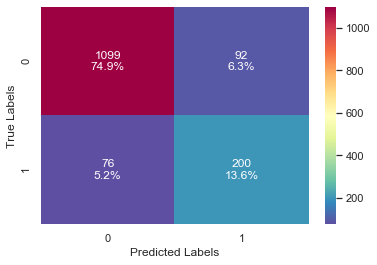

In [780]:
dectree = DecisionTreeClassifier(class_weight = {0:0.10, 1:0.90}, random_state = 1)
dectree.fit(X_train, y_train)

dtree_perf_train = print_scores(dectree, X_train, y_train)
print("Training performance")
print(dtree_perf_train)

dtree_perf_test = print_scores(dectree, X_test, y_test)
print("Testing performance")
print(dtree_perf_test)

confmat_sk(dectree, X_test, y_test)

Our model overfits on the training set, and F1 is decent on training.
It predicted 200/276 1's correctly and 1099/1191 0's correctly. This is pretty good in a real world scenario.
We'll perform some tuning after and see if we can do better.

### Model 2 - Bagging Classifier

Training performance
   Accuracy    Recall  Precision        F1
0  0.994154  0.970497   0.998403  0.984252
Testing performance
   Accuracy    Recall  Precision        F1
0  0.915474  0.637681       0.88  0.739496


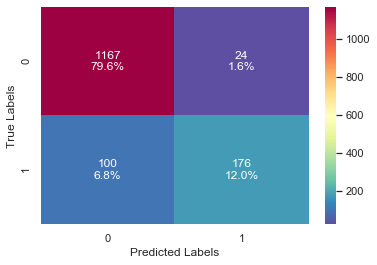

In [776]:
# We'll specify a base estmimator in our decision tree

bag =  BaggingClassifier(random_state = 1)
bag.fit(X_train, y_train)  

bag_train = print_scores(bag, X_train, y_train)
print("Training performance")
print(bag_train)

bag_test = print_scores(bag, X_test, y_test)
print("Testing performance")
print(bag_test)

confmat_sk(bag, X_test, y_test)

The model doesn't generalize too well on training and testing, but our F1-Score has improved a bit on training.
The number of correctly predicted 1's reduced, and the number of correctly predicted 0's increased.

### Model 3 - Random Forest

Training performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance
   Accuracy  Recall  Precision        F1
0  0.899796     0.5   0.938776  0.652482


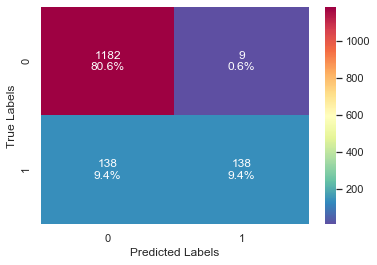

In [804]:
rf = RandomForestClassifier(random_state = 1, class_weight = {0:0.10, 1:0.90})
rf.fit(X_train, y_train)

rtree_train = print_scores(rf, X_train, y_train)
print("Training performance")
print(rtree_train)

rtree_test = print_scores(rf, X_test, y_test)
print("Testing performance")
print(rtree_test)

confmat_sk(rf, X_test, y_test)

Our F1 went down with this one. We'll see what happens with tuning.

## Model Tuning

* In an attempt to choose the best model for our predicitions, we will tune them all and see which is optimal
* We will use Grid Search Cross Validation (**GridSearchCV**)
* GridSearchCV experiments by finding the optimal values for the model hyperparameters
* Parameters are optimized by searchng over a parameter grid to find the best combination of values in the grid

### Tuning the Decison Tree

In [796]:
# Decision Tree Classifier
mod1 = DecisionTreeClassifier(class_weight = {0:0.10, 1:0.90}, random_state = 1)

# Parameter to find optimal values from
parms = {'max_depth' : np.arange(2,30),
         'min_samples_leaf' : [2,3,5,10],
         'max_leaf_nodes' : [2,3,5,10,12],
         'min_impurity_decrease' : [0.00001, 0.0001, 0.01]}

# Score used to compare parameters
# We will set this to Recall since we aim to minimize false negatives 
score_by = metrics.make_scorer(metrics.f1_score)

# Run search 
grid = GridSearchCV(mod1, parms, scoring = score_by)
grid = grid.fit(X_train, y_train)

# Set clf to optimal combinaton of hyperparameter values 
mod1 = grid.best_estimator_
mod1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       max_leaf_nodes=12, min_impurity_decrease=1e-05,
                       min_samples_leaf=2, random_state=1)

#### Print Scores 

Training performance
   Accuracy   Recall  Precision        F1
0  0.513593  0.90528   0.266697  0.412014
Testing performance
   Accuracy    Recall  Precision      F1
0  0.476483  0.873188   0.247433  0.3856


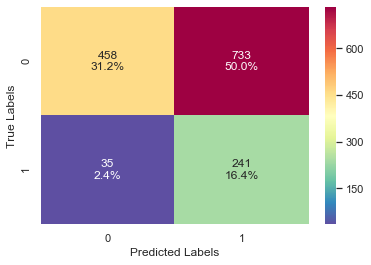

In [797]:
mod1p_train = print_scores(mod1, X_train, y_train)
print("Training performance")
print(mod1p_train)

mod1p_test = print_scores(mod1, X_test, y_test)
print("Testing performance")
print(mod1p_test)

confmat_sk(mod1, X_test, y_test)

* 0ur scores are not great, and F1 is low now. we have a good number of True positives but also lots of False Positives
* The intial model was better

### Tuning the Bagging Classifier 

In [799]:
# Choose the type of classifier. 
bagtuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parmss = {'max_samples': [0.7,0.8,0.9], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scoring = metrics.make_scorer(metrics.f1_score)

# Run the grid search
gridb = GridSearchCV(bagtuned, parmss, scoring=scoring)
gridb = gridb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagtuned = gridb.best_estimator_

# Fit the best algorithm to the data.
bagtuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Training performance
   Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223
Training performance
   Accuracy    Recall  Precision        F1
0  0.919564  0.648551      0.895  0.752101


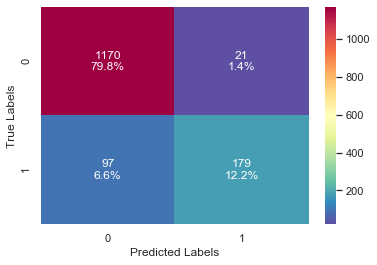

In [800]:
mod2p_train = print_scores(bagtuned, X_train, y_train)
print("Training performance")
print(mod2p_train)

mod2p_test = print_scores(bagtuned, X_test, y_test)
print("Training performance")
print(mod2p_test)

confmat_sk(bagtuned, X_test, y_test)

* F1 on the testing set has improved a bit after hypertuning but not by a huge amount. Accuracy and precision are high so the model is making correct predictions on testing.

### Tuning the Random Forest 

In [801]:
# Choose the classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.10,1:0.90}, random_state=1, bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,20,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,10,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,50,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
gridr = GridSearchCV(rf_tuned, parameters, scoring=scorer, n_jobs=-1)
gridr = gridr.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = gridr.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=15,
                       max_features=None, min_samples_split=7, n_estimators=40,
                       random_state=1)

Training performance
   Accuracy  Recall  Precision        F1
0  0.988892     1.0   0.944282  0.971342
Training performance
   Accuracy    Recall  Precision        F1
0  0.899114  0.673913   0.762295  0.715385


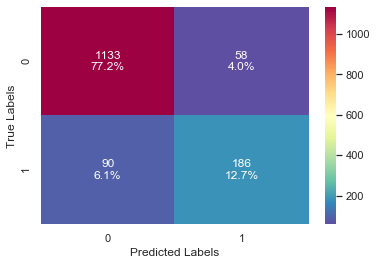

In [802]:
mod3p_train = print_scores(rf_tuned, X_train, y_train)
print("Training performance")
print(mod3p_train)

mod3p_test = print_scores(rf_tuned, X_test, y_test)
print("Training performance")
print(mod3p_test)

confmat_sk(rf_tuned, X_test, y_test)

The F1-Score on the testing set using the tuned Random Forest has gone up after tuning.

To get a sense of what we've done so far in terms of modelling and tuning, we'll compare models.

In [805]:
# training performance comparison

modstr_df = pd.concat(
    [dtree_perf_train.T, bag_train.T, rtree_train.T, mod1p_train.T, mod2p_train.T, mod3p_train.T], axis=1)

modstr_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training Performance Comparison")

modstr_df

Training Performance Comparison


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.994154,1.0,0.513593,0.999708,0.988892
Recall,1.0,0.970497,1.0,0.905280,0.998447,1.000000
Precision,1.0,0.998403,1.0,0.266697,1.000000,0.944282
F1,1.0,0.984252,1.0,0.412014,0.999223,0.971342


In [806]:
# testing performance comparison

modstest_df = pd.concat(
    [dtree_perf_test.T, bag_test.T, rtree_test.T, mod1p_test.T, mod2p_test.T, mod3p_test.T], axis=1)

modstest_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing Performance Comparison")

modstest_df

Testing Performance Comparison


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.885481,0.915474,0.899796,0.476483,0.919564,0.899114
Recall,0.724638,0.637681,0.500000,0.873188,0.648551,0.673913
Precision,0.684932,0.880000,0.938776,0.247433,0.895000,0.762295
F1,0.704225,0.739496,0.652482,0.385600,0.752101,0.715385


So far the bagging classifier has the best F1 score and generaliizes the best but it isn't great.
We'll build more models

## Boosting Models

### Adaboosting Classifier

Training performance
   Accuracy    Recall  Precision        F1
0  0.847121  0.326087   0.702341  0.445387
Testing performance
   Accuracy    Recall  Precision       F1
0  0.845944  0.333333   0.686567  0.44878


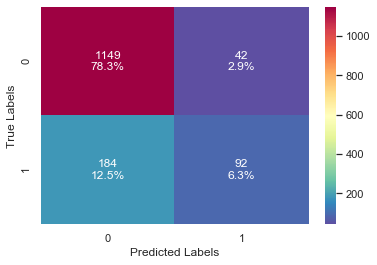

In [807]:
ab=AdaBoostClassifier(random_state=1 )
ab.fit(X_train,y_train)

ab_score = print_scores(ab, X_train, y_train) # print training scores
print("Training performance")
print(ab_score)

ab_scoretest = print_scores(ab, X_test, y_test) # print testing scores 
print("Testing performance")
print(ab_scoretest)

confmat_sk(ab, X_test, y_test) # print confusion matrix

This Adaboost  model generalizes well however, the F1 which we'd like to maximize, is low

### Gradient Boosting Model

Training performance
   Accuracy    Recall  Precision        F1
0  0.888044  0.459627    0.89426  0.607179
Testing performance
   Accuracy    Recall  Precision        F1
0  0.875937  0.427536   0.830986  0.564593


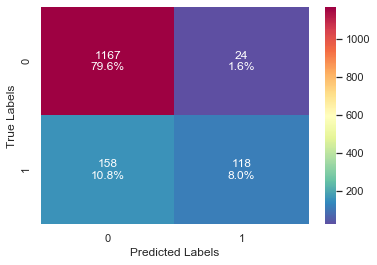

In [808]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

gb_score = print_scores(gb, X_train, y_train)
print("Training performance")
print(gb_score)

gb_scoretest = print_scores(gb, X_test, y_test)
print("Testing performance")
print(gb_scoretest)

confmat_sk(gb, X_test, y_test)

This performs a bit better than the AdaBoosting model but F1 scores are still not great

### XGBoost Classifier

Training performance
   Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223
Testing performance
   Accuracy    Recall  Precision        F1
0  0.925699  0.699275   0.881279  0.779798


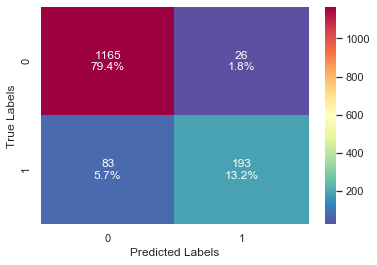

In [809]:
xgb= XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

xgb_score = print_scores(xgb, X_train, y_train)
print("Training performance")
print(xgb_score)

xgb_scoretest = print_scores(xgb, X_test, y_test)
print("Testing performance")
print(xgb_scoretest)

confmat_sk(xgb, X_test, y_test)

This model is overfitting on training data but F1 has gone up a bit. Accuracy and precision are good too, so our predicitons are good. 

### Tuning the Initial Boosting Models

#### Tuning the AdaBoost Model

In [810]:
ab_tuned = AdaBoostClassifier(random_state = 1)

parms4 = {"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,50,10),
    "learning_rate":np.arange(0.1,2,0.2)}

# Score used to compare parameters
# We will set this to f1 score to match our goal
score_by2 = metrics.make_scorer(metrics.f1_score)

# Run search 
grid4 = GridSearchCV(ab_tuned, parms4, scoring = score_by2)
grid4 = grid4.fit(X_train, y_train)

# Set clf to optimal combinaton of hyperparameter values 
ab_tuned = grid4.best_estimator_

# fit to optimal data
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9000000000000001, n_estimators=40,
                   random_state=1)

Training performance
   Accuracy    Recall  Precision        F1
0  0.926045  0.694099   0.888668  0.779425
Testing performance
   Accuracy    Recall  Precision        F1
0  0.864349  0.492754   0.697436  0.577495


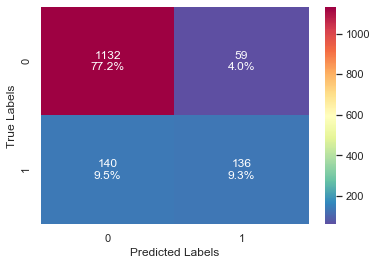

In [816]:
abt_score = print_scores(ab_tuned, X_train, y_train)
print("Training performance")
print(abt_score)

abt_scoretest = print_scores(ab_tuned, X_test, y_test)
print("Testing performance")
print(abt_scoretest)

confmat_sk(ab_tuned, X_test, y_test)

The F1 score has gone up but it's still not great. Let's see what happens when we tune the other models

#### Tuning the Gradient Booster

In [815]:
# Choosing the classifier. 
gb_tuned = GradientBoostingClassifier(init = AdaBoostClassifier(random_state = 1), random_state = 1)

# Grid of parameters
parms6 = {
    "n_estimators": [50,80,100],
    "subsample":[0.8,0.9,0.7],
    "max_features":[0.6,0.7,0.8,0.9]
}

# Type of scoring used to compare parameter combinations
scoring = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid5 = GridSearchCV(gb_tuned, parms6, scoring = scoring)
grid5 = grid5.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid5.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.9)

Training performance
   Accuracy    Recall  Precision        F1
0  0.886291  0.450311   0.892308  0.598555
Testing performance
   Accuracy    Recall  Precision        F1
0  0.865712  0.380435   0.801527  0.515971


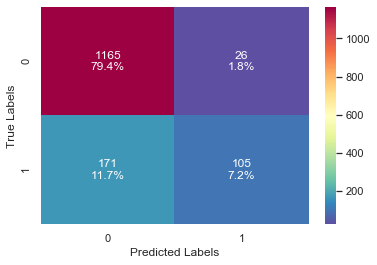

In [817]:
gbt_score = print_scores(gb_tuned, X_train, y_train)
print("Training performance")
print(gbt_score)

gbt_scoretest = print_scores(gb_tuned, X_test, y_test)
print("Testing performance")
print(gbt_scoretest)

confmat_sk(gb_tuned, X_test, y_test)

The F1 dropped after tuning the Gradient Booster.
With hyperparameter tuning we're really taking chances are there are potentially so many parameters and values to try.

#### Tuning the Extreme Gradient Booster

In [830]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
paras = {
    "n_estimators": [10,20,30],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.8,0.9],
    "learning_rate":[0.05,0.1,0.2],
    "colsample_bytree":[0.7,0.8,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare combos
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
gridx = GridSearchCV(xgb_tuned, paras,scoring = scorer, n_jobs=-1)
gridx = gridx.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = gridx.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance
   Accuracy    Recall  Precision        F1
0  0.944461  0.979814   0.780941  0.869146
Testing performance
   Accuracy    Recall  Precision        F1
0  0.875256  0.811594   0.630986  0.709984


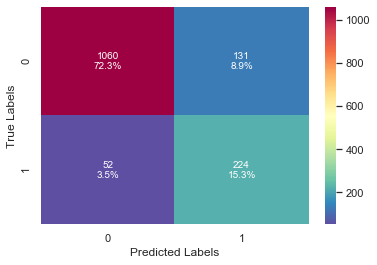

In [831]:
xgbt_score = print_scores(xgb_tuned, X_train, y_train)
print("Training performance")
print(xgbt_score)

xgbt_scoretest = print_scores(xgb_tuned, X_test, y_test)
print("Testing performance")
print(xgbt_scoretest)

confmat_sk(xgb_tuned, X_test, y_test)

This model generalizes a lot better, though the F1 score dropped slightly. Overall it should perform better on real data

Finally let's build a stacking classifier with different models previously built

### Stacking Classifier

In [834]:
#We're using the tuned random forest, tuned AdaBoost, and our Original decision tree

estimators = [('Random Forest',rf_tuned), ('AdaBoosting',ab_tuned), ('Decision Tree',dectree)]

final_estimator = xgb

stack_class = StackingClassifier(estimators = estimators,final_estimator = final_estimator)

stack_class.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.1,
                                                                     1: 0.9},
                                                       max_depth=15,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       n_estimators=40,
                                                       random_state=1)),
                               ('AdaBoosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.9000000000000001,
                                                   n_estimators=40,
                                                   random_state=1)),
                               ('Decision Tree',
           

Training performance
   Accuracy    Recall  Precision        F1
0  0.983923  0.947205   0.966719  0.956863
Testing performance
   Accuracy   Recall  Precision        F1
0  0.896387  0.65942   0.758333  0.705426


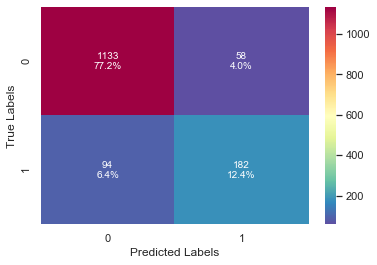

In [835]:
stack_score = print_scores(stack_class, X_train, y_train)
print("Training performance")  # print training scores
print(stack_score)

stack_scoretest = print_scores(stack_class, X_test, y_test)
print("Testing performance") # print testing scores 
print(stack_scoretest)

confmat_sk(stack_class, X_test, y_test) # confusion matrix

The F1 score with the stacking classifier does not show any huge improvement from the previous models and also doesn't generalize too well.

### Let's compare all the models we've built so far.

Print Training Scores

In [846]:
# training performance comparison

# we're joining the scores into a frame to compare
modstr_df = pd.concat(
    [dtree_perf_train.T, bag_train.T, rtree_train.T, mod1p_train.T, mod2p_train.T, mod3p_train.T
    ,ab_score.T,abt_score.T,gb_score.T,gbt_score.T,xgb_score.T,xgbt_score.T,stack_score.T], axis=1)

# model names as columns
modstr_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

print("Training Performance Comparison")

modstr_df

Training Performance Comparison


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.994154,1.0,0.513593,0.999708,0.988892,0.847121,0.926045,0.888044,0.886291,0.999708,0.944461,0.983923
Recall,1.0,0.970497,1.0,0.905280,0.998447,1.000000,0.326087,0.694099,0.459627,0.450311,0.998447,0.979814,0.947205
Precision,1.0,0.998403,1.0,0.266697,1.000000,0.944282,0.702341,0.888668,0.894260,0.892308,1.000000,0.780941,0.966719
F1,1.0,0.984252,1.0,0.412014,0.999223,0.971342,0.445387,0.779425,0.607179,0.598555,0.999223,0.869146,0.956863


Print Testing Scores

In [842]:
# testing performance comparison

# Same idea as above but showing 

modstr_df = pd.concat(
    [dtree_perf_test.T, bag_test.T, rtree_test.T, mod1p_test.T, mod2p_test.T, mod3p_test.T
    ,ab_scoretest.T,abt_scoretest.T,gb_scoretest.T,gbt_scoretest.T,xgb_scoretest.T,xgbt_scoretest.T,stack_scoretest.T], axis=1)

modstr_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

print("Testing Performance Comparison")

modstr_df

Testing Performance Comparison


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.885481,0.915474,0.899796,0.476483,0.919564,0.899114,0.845944,0.864349,0.875937,0.865712,0.925699,0.875256,0.896387
Recall,0.724638,0.637681,0.500000,0.873188,0.648551,0.673913,0.333333,0.492754,0.427536,0.380435,0.699275,0.811594,0.659420
Precision,0.684932,0.880000,0.938776,0.247433,0.895000,0.762295,0.686567,0.697436,0.830986,0.801527,0.881279,0.630986,0.758333
F1,0.704225,0.739496,0.652482,0.385600,0.752101,0.715385,0.448780,0.577495,0.564593,0.515971,0.779798,0.709984,0.705426


* The overall highest F1 score was seen in the XGBoost Classifier but the model overfits on training data
* The Tuned XGBoost Classifier generalizes the best on training and testing data out of our models and though we may want to see a higher F1 score, ~ 0.71 is fairly ok especially in this use case. 
* Overall the F1 on training scores was split across some overfit ones, some low ones, and some acceptable ones


#### Let's view the features that were important in the building of our tree previously to get a sense of what matters

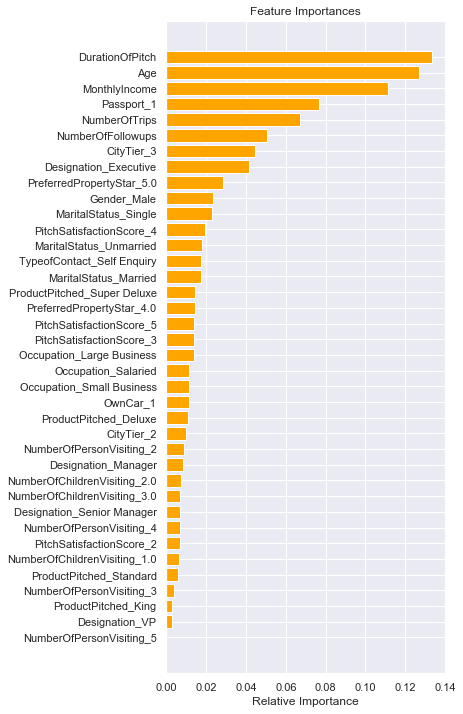

In [859]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color ='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Duration of the Pitch, Age, and Income appear to be the most important.

## Insights

* Overall, the Basic package should be the most pitched package as it was the most purchased across many customer dimensions. 
* The Deluxe is the 2nd most popular package.  If there is minimal info on the customer available in the moment, the company should pitch one of these two to increase the likelihood of purchase
* When  customers call in on their own, they are more likely to buy the basic package if pitched
* More customers with passports previously purchased a package than those who didn’t
* Customers with 2, 3, and 4 people planning/available to travel are more likely to purchase when pitched
* All our freelancers purchased but 2 out of a sample of almost 5000 is not enough to make inferences on
* The decision tree showed Duration of Pitch as an important feature so we may consider optimizing our pitch times.

Here are some ideal features for clients to pitch appropriate packages to:
* Basic - Average monthly income of approx. 20,000, Executive Designation, May or may not have passport, traveling with 2 to 4 people, single or married
* Deluxe - Average monthly income between 20,000 and 25,000 , Manager Designation, May or may not have passport, traveling with 2 to 4 people, single or married
* Standard - Average Monthly income > 25,000, Senior Manager Designation, Has passport, traveling with 2 to 4 people
* Super Deluxe - Average Monthly income > 30,000 , AVP and VP designations, Has passport, traveling with 2 to 4 people, single or married
* King - Average Monthly income > 35,000, VP designation , Has passport, traveling with 2 to 4 people, single or married
